## Species area and endemic area relationship

Species area relationship (SAR) diagram shows us how the number of species scales with the area that we sample. In the small and large scales the bahaviour is a linear increase, while in the medium scales the increase is sublinear.

In order to explore the medium scales regime, we take the "null model", that says that all species are well mixed.

If we denote the total area $A$ into $K$ equal subregions $a$, then we can define $\alpha = \frac{a}{A}$.

- The probability for a given individual not to lie within one subregion is $1-\alpha$
- If the species is of the population $n_i$, then the probability of not being present within one subregion is $q_i = (1 - \alpha_i)^{n_i}$

$\rightarrow$ the probabilty to find at least one individual of the species $i$ is $p_i = 1 - (1 - \alpha_i)^{n_i}$.

We can consider the process of finding $s \leq S$ number of species as $s$ independent Bernoulli trials $Q_i(\alpha)$ ($S$ - total number of species on the whole territory) with probabaility of success $p_i$ and the probability of failure $q_i = 1 - p_i$: $Q_s(\alpha) = \prod_{i}^{s} Q_i(\alpha)$.

With the help of generative function $G_i(z) = (1-p_i) + p_iz$ it is possible to show that:

$$
\langle s(a|\textbf{n}) \rangle = S - \sum_{i = 1}^{S}(1 - \alpha)^{n_i},
$$
$$
\sigma^2(a|\textbf{n}) = \sum_{i = 1}^{S}( (1 - \alpha)^{n_i} - (1 - \alpha)^{2 n_i}).
$$

In order to get rid of $\textbf{n} = (n_1, ..., n_S)$, we need to average over configurations:

$$
SAR(\alpha) = \sum_{n1, ..., n_S} \langle s(\alpha|\textbf{n}) \rangle P(\textbf{n})
$$

We assume that all apecies are independent (neutral case; $P(\textbf{n}) = \prod_{j=1}^{S}P(n_j)$), then the equation above becomes:
$$
SAR(\alpha) = \langle S(a) \rangle = S (1 - \sum_{n=1}^{\infty}(1 - \alpha) P(n)).
$$

If we now consider $P(n_i)$ as a log-series distribution (m - migration rate):
$$
P(n_i) = \frac{(1 - m)^{n_i}}{n_i} \frac{1}{|log(m)|},
$$
then 
$$
SAR(\alpha) = S(1 - \frac{log(m(1-\alpha) + \alpha)}{log(m)}).
$$

The experimental data suggests in this medium scale $SAR(a) \propto a^{z}$ with $z \in [0.2, 0.3]$.

We will plot the theoretical prediction and the experimental power law in order to compare them.

The Endemic Area Relationship (EAR) is defined as the number of species whose individuals are completely contained inside a given area $a$:
$$
EAR(a|\textbf{n}) = \sum_{i=1}^{S} \alpha^{n_i}
$$

If we average over configuarations, we get:
$$
EAR(S) = S \sum_{n=1}^{\infty} \alpha^nP(n) = \frac{S}{|log(m)|}(-log(\alpha m - \alpha + 1))
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def SAR(S, alpha, m):
    
    num = len(alpha)
    SAR = np.zeros(num)
    
    SAR = S*(1 - np.log(m*(1 - alpha) + alpha)/np.log(m) )
    return SAR

In [3]:
def power(a, z):
    return a**z

I take $\alpha$ in a range [0.3, 0.7], since we talk about medium scales.

In [4]:
S = 1000
alpha = np.linspace(0.3, 0.7, 100)
m = 0.2

sar = SAR(S, alpha, m)

For the power law I take two extreme values - 0.2 and 0.3, so that it can be seen where the lines with "good" power lie, and 0.25 as a medium case. I tuned the constant in the power law, so that the lines lie near the SAR for log-series.

(0.3, 0.7)

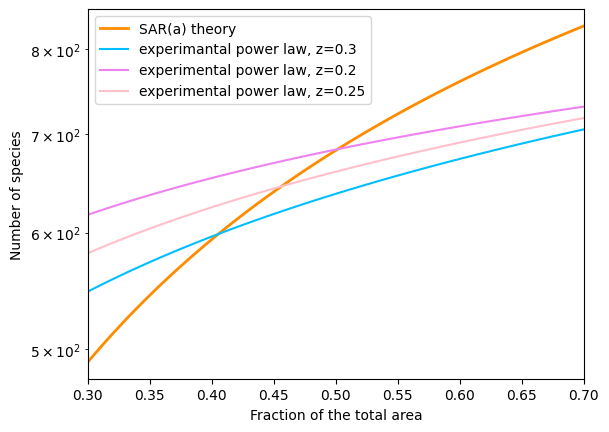

In [5]:
plt.plot(alpha, sar, color='darkorange', linewidth=2)
plt.plot(alpha, 785*power(alpha, 0.3), color='deepskyblue')
plt.plot(alpha, 785*power(alpha, 0.2), color='violet')
plt.plot(alpha, 785*power(alpha, 0.25), color='pink')
plt.yscale('log')
plt.xlabel("Fraction of the total area")
plt.ylabel("Number of species")
plt.legend(["SAR(a) theory", "experimantal power law, z=0.3", "experimental power law, z=0.2",
           "experimental power law, z=0.25"])
plt.xlim(min(alpha), max(alpha))

As we can see, we do not obtain the power law, if we take the approach we considered and log-series for the probability, the growth of the function obtained is much faster.

In [6]:
def EAR(a, m, S):
    return -np.log(a*m - a + 1)*S/np.abs(np.log(m))

(0.3, 0.7)

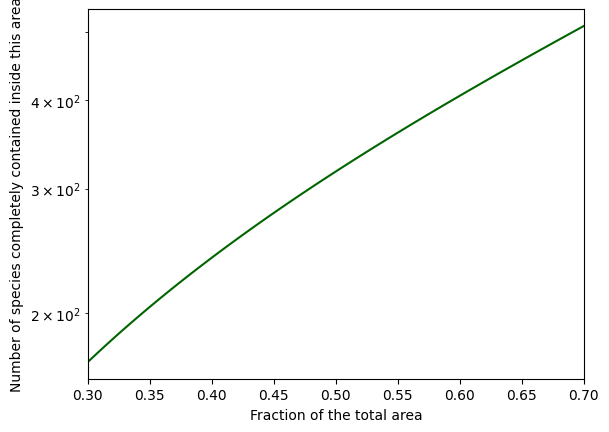

In [7]:
ear = EAR(alpha, m, S)


plt.plot(alpha, ear, color = 'darkgreen')
plt.yscale('log')
plt.xlabel("Fraction of the total area")
plt.ylabel("Number of species completely contained inside this area")
plt.xlim(min(alpha), max(alpha))